In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv("D:/DataScience_DataSets/04. Clustering/Universities.csv")

In [3]:
data

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


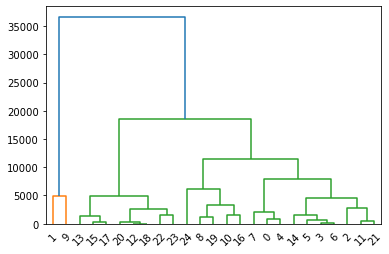

In [5]:
denrogram = sch.dendrogram(sch.linkage(data.iloc[:,1:], method = 'average'))

In [6]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete').fit(data.iloc[:,1:])

In [7]:
hc.labels_

array([4, 3, 1, 1, 4, 1, 1, 4, 0, 3, 0, 1, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1,
       2, 2, 0], dtype=int64)

In [8]:
data['Cluster'] = hc.labels_

In [9]:
data

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,Brown,1310,89,22,13,22704,94,4
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,4
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,1
7,Georgetown,1255,74,24,12,20126,92,4
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [10]:
data.iloc[:,1:].groupby(data.Cluster).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
Cluster,,,,,,,
0,1361.000000,89.000000,26.600000,11.400000,38547.800000,92.800000,0
1,1306.428571,81.857143,32.142857,10.428571,29444.000000,89.142857,1
2,1143.250000,59.125000,59.250000,17.125000,12361.625000,79.500000,2
3,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000,3
4,1281.666667,82.000000,26.333333,12.666667,21564.666667,92.000000,4
